In [1]:
from classifier_manager import *
from dataset_manager import *
from metrics import *
import matplotlib.pyplot as plt
from roc_pr_tools import *
from plot_tools import *
from sklearn.base import BaseEstimator, ClassifierMixin

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
class RandomCassifier(BaseEstimator, ClassifierMixin):
     def __init__(self):
        pass
     def fit(self, X, y):
        pass
     def predict(self, X):
        n = len(X)
        y_preditions = np.random.randint(2, size = n)
        confidence = np.random.uniform(0.0, 1.0, size = n)
        
        confidence_1 = [confidence[i] if y_preditions[i] == 1 else (1 - confidence[i]) for i in range(n)]

        return np.asarray(confidence_1)

In [3]:
n = 500
classifier = RandomCassifier()
y_test = np.random.randint(2, size = n)

predictions = classifier.predict(y_test)

In [4]:
fpr, tpr = get_roc_curve(predictions, y_test)
print("Area under ROC curve: ", get_auc(fpr, tpr))

recalls, precisions = get_pr_curve(predictions, y_test)
print("Area under PR curve: ", get_auc(recalls, precisions ))

Area under ROC curve:  0.4809920000000001
Area under PR curve:  0.5064855065468319


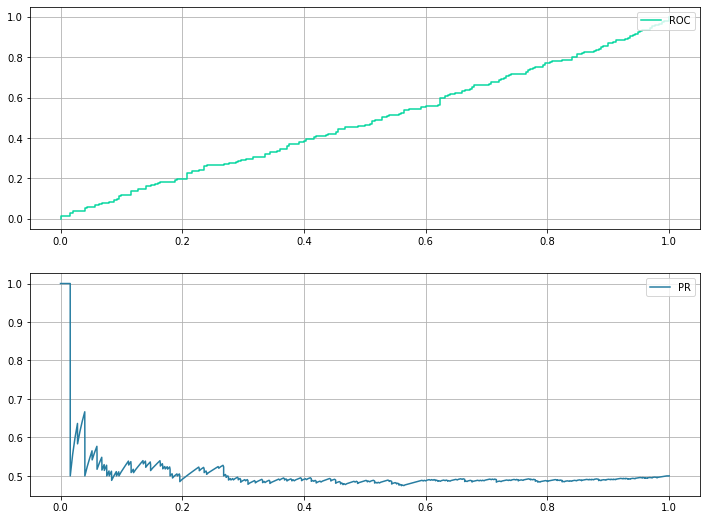

In [5]:
plt.rcParams['figure.figsize'] = [12, 9]

showPlots([{'data': tpr, 'x': fpr, 'label': "ROC"},
           {'data': precisions, 'x': recalls, 'label': "PR"}])